In [ ]:
pip install recommenders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 7.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.3/355.3 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.5/31.5 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.2/264.2 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 106.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.0/113.0 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 501.1/501.1 kB 29.8 MB/s e

## Preparation

In [1]:
import pickle
import ast
import json
import random
import collections
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# import recommenders

# from recommenders.datasets.python_splitters import (
#     python_random_split,
#     python_chrono_split,
#     python_stratified_split
# )

In [2]:
sns.set_style('whitegrid')

In [3]:
animelist = pd.read_csv('/content/drive/MyDrive/Final Project/Codes/animelist-goodbooks-recommendation/animelist/user_animelist_data_completed_above5.csv')
anime_detail = pd.read_csv('/content/drive/MyDrive/Final Project/Codes/animelist-goodbooks-recommendation/animelist/anime_detail_data_17k.csv')

In [4]:
animelist.head()

,username,anime_id,anime_title,status,score,num_episodes_watched,updated_at,user_id
0,----2o,8074,Highschool of the Dead,completed,7,12,2017-04-03T06:08:19+00:00,1
1,----2o,31952,Kono Bijutsu-bu ni wa Mondai ga Aru!,completed,7,12,2017-07-22T22:20:08+00:00,1
2,----2o,15227,Kono Sekai no Katasumi ni,completed,9,1,2018-02-10T05:41:34+00:00,1
3,----2o,30831,Kono Subarashii Sekai ni Shukufuku wo!,completed,8,10,2016-12-01T23:13:26+00:00,1
4,----2o,32937,Kono Subarashii Sekai ni Shukufuku wo! 2,completed,8,10,2017-03-16T05:58:32+00:00,1


In [5]:
anime_detail.head()

,id,title,main_picture,alternative_titles,start_date,end_date,mean,rank,popularity,num_list_users,num_scoring_users,nsfw,media_type,status,genres,num_episodes,rating,pictures,related_anime,source
0,2833,Gulliver no Uchuu Ryokou,{'medium': 'https://cdn.myanimelist.net/images...,"{'synonyms': [""Gulliver's Space Travels: Beyon...",1965-03-20,1965-03-20,5.78,10802.0,11451,2129,1008,white,movie,finished_airing,"[{'id': 2, 'name': 'Adventure'}, {'id': 24, 'n...",1,g,[{'medium': 'https://cdn.myanimelist.net/image...,[],NaN
1,56784,Bleach: Sennen Kessen-hen - Soukoku-tan,{'medium': 'https://cdn.myanimelist.net/images...,{'synonyms': ['Bleach: Thousand-Year Blood War...,2024-10-05,NaN,NaN,NaN,2176,99431,61,white,tv,currently_airing,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'...",0,r,[{'medium': 'https://cdn.myanimelist.net/image...,"[{'node': {'id': 53998, 'title': 'Bleach: Senn...",manga
2,42397,Benkai to Ushiwakamaru,{'medium': 'https://cdn.myanimelist.net/images...,"{'synonyms': [], 'en': 'Benkei and Ushiwakamar...",1999-12-04,1999-12-04,NaN,16487.0,19459,287,67,white,movie,finished_airing,"[{'id': 4, 'name': 'Comedy'}, {'id': 13, 'name...",1,pg,[{'medium': 'https://cdn.myanimelist.net/image...,"[{'node': {'id': 14249, 'title': 'Ribbon no Ki...",NaN
3,38162,Rinshi!! Ekoda-chan,{'medium': 'https://cdn.myanimelist.net/images...,"{'synonyms': ['Near Death!! Ekoda-chan'], 'en'...",2019-01-09,2019-03-27,5.53,11736.0,6256,11364,3767,white,tv,finished_airing,"[{'id': 4, 'name': 'Comedy'}, {'id': 42, 'name...",11,pg_13,[{'medium': 'https://cdn.myanimelist.net/image...,"[{'node': {'id': 10540, 'title': 'Genki!! Ekod...",4_koma_manga
4,729,Hiatari Ryoukou!,{'medium': 'https://cdn.myanimelist.net/images...,"{'synonyms': ['Hiatari Ryoukou'], 'en': 'Sunny...",1987-03-29,1988-03-20,7.01,4280.0,8172,5912,1455,white,tv,finished_airing,"[{'id': 4, 'name': 'Comedy'}, {'id': 22, 'name...",48,pg_13,[{'medium': 'https://cdn.myanimelist.net/image...,"[{'node': {'id': 1552, 'title': 'Hiatari Ryouk...",manga


In [7]:
anime_detail.columns

Index(['id', 'title', 'main_picture', 'alternative_titles', 'start_date',
       'end_date', 'mean', 'rank', 'popularity', 'num_list_users',
       'num_scoring_users', 'nsfw', 'media_type', 'status', 'genres',
       'num_episodes', 'rating', 'pictures', 'related_anime', 'source'],
      dtype='object')

In [13]:
anime_detail['source'].unique()

array([nan, 'manga', '4_koma_manga', 'original', 'light_novel', 'novel',
       'picture_book', 'game', 'other', 'mixed_media', 'web_manga',
       'visual_novel', 'music', 'web_novel', 'card_game', 'book', 'radio'],
      dtype=object)

In [ ]:
anime_detail['main_picture'] = anime_detail['main_picture'].fillna('{}')
anime_detail['genres'] = anime_detail['genres'].fillna('[]')
anime_detail['related_anime'] = anime_detail['related_anime'].fillna('[]')

anime_detail['main_picture'] = anime_detail['main_picture'].apply(ast.literal_eval)
anime_detail['genres'] = anime_detail['genres'].apply(ast.literal_eval)
anime_detail['related_anime'] = anime_detail['related_anime'].apply(ast.literal_eval)

## EDA

In [ ]:
len(animelist), len(anime_detail)

(3733636, 17827)

In [ ]:
len(animelist['user_id'].unique())

22989

In [ ]:
len(animelist['anime_title'].unique())

13947

In [ ]:
count_anime_watch_user = animelist.groupby('user_id').agg({'anime_id':'nunique'})
count_anime_watch_user[["anime_id"]].describe().T

,count,mean,std,min,25%,50%,75%,max
anime_id,22989.0,162.409674,197.601952,1.0,36.0,98.0,216.0,2584.0


In [ ]:
count_anime_watch_user[count_anime_watch_user.anime_id < 10]

,anime_id
user_id,
2,6
23,5
42,1
46,1
50,1
...,...
22957,6
22959,7
22966,4


<Axes: xlabel='anime_id', ylabel='Count'>

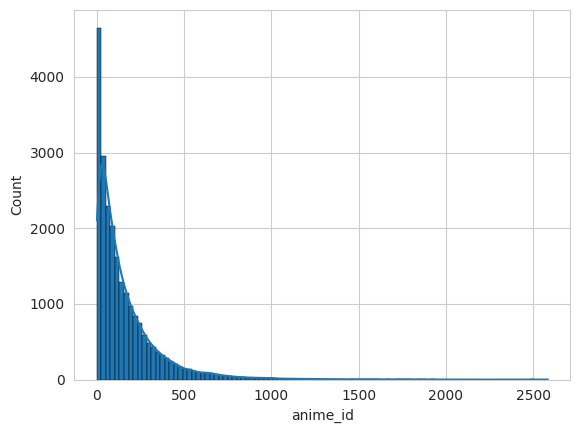

In [ ]:
sns.histplot(count_anime_watch_user["anime_id"],bins=100,alpha=1,fill=True, kde=True, edgecolor="black")

<Axes: title={'center': 'Score Distribution'}, xlabel='score'>

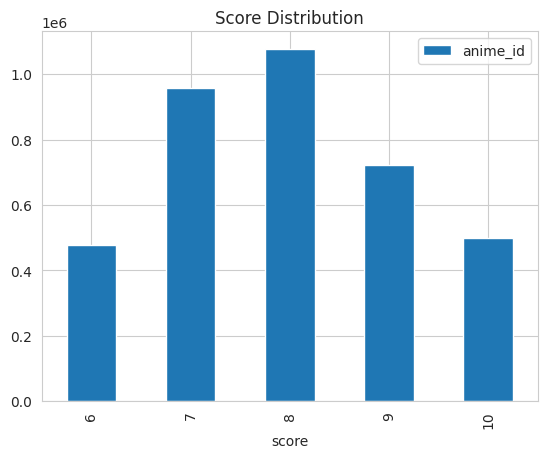

In [ ]:
animelist.groupby('score').count()[['anime_id']].plot(kind="bar", title="Score Distribution")

In [ ]:
user_score_stat =  animelist.groupby('user_id').agg({'score':['min','mean','median','max','std']})
user_score_stat.columns = ["_".join(a) for a in user_score_stat.columns.to_flat_index()]
user_score_stat

,score_min,score_mean,score_median,score_max,score_std
user_id,,,,,
1,6,7.881773,8.0,10,0.853538
2,8,9.333333,9.5,10,0.816497
3,6,7.458716,7.0,10,1.143493
4,6,7.905797,8.0,10,0.903260
5,6,7.897436,8.0,10,1.212379
...,...,...,...,...,...
22985,6,7.057143,7.0,10,1.249762
22986,6,7.480000,8.0,10,0.944762
22987,6,8.938272,9.0,10,1.040981


In [ ]:
anime_stat = animelist.groupby('anime_title').agg({'user_id': 'count', 'score':'mean'})

In [ ]:
anime_stat.user_id.describe()

,user_id
count,13947.000000
mean,267.701728
std,726.747467
min,1.000000
25%,3.000000
50%,23.000000
75%,177.500000
max,13340.000000


In [ ]:
anime_stat[anime_stat.user_id < 20]

,user_id,score
anime_title,,
!NVADE SHOW!,7,7.285714
"""0""",14,6.500000
"""Calpis"" Hakkou Monogatari",1,6.000000
"""Eiyuu"" Kaitai",12,6.833333
"""Hataraku"" no 100-nenshi",6,7.000000
...,...,...
number24 Recap,6,7.333333
s.CRY.ed Alteration I: Tao,16,7.687500
s.CRY.ed Alteration II: Quan,13,7.615385


In [ ]:
animelist_detail = pd.merge(anime_filtered, anime_detail.rename(columns={'title':'anime_title'}), on='anime_title',  how='left')

In [ ]:
animelist_detail.columns

Index(['username', 'anime_id', 'anime_title', 'status_x', 'score',
       'num_episodes_watched', 'updated_at', 'user_id', 'id', 'main_picture',
       'alternative_titles', 'start_date', 'end_date', 'mean', 'rank',
       'popularity', 'num_list_users', 'num_scoring_users', 'nsfw',
       'media_type', 'status_y', 'genres', 'num_episodes', 'rating',
       'pictures', 'related_anime', 'source'],
      dtype='object')

In [ ]:
from IPython.display import display, HTML

# Function to display images and descriptions
def display_images_with_descriptions(df, num_rows=5):
    """
    Display images and descriptions from a DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame containing image URLs and descriptions.
        url_col (str): The column name for the image URLs.
        desc_col (str): The column name for the descriptions.
        num_rows (int): Number of rows to display. Default is 5.
    """
    # Limit the number of rows displayed
    df_to_display = df.head(num_rows)

    # Generate HTML content for display
    html_content = "<div style='display: flex; flex-wrap: wrap; gap: 20px;'>"
    for _, row in df_to_display.iterrows():
        html_content += f"""
        <div style='text-align: center;'>
            <img src='{row["main_picture"]["medium"]}' alt='Image' style='width: 100px; height: auto;'><br>
            <p>{row["anime_title"]}</p>
            <p>User Rating: {row["score"]}</p>
            <p>Overall Rating: {row["mean"]}</p>
        </div>
        """
    html_content += "</div>"

    # Render HTML in the notebook
    display(HTML(html_content))

In [ ]:
sample = animelist_detail[animelist_detail.user_id == 2024]

In [ ]:
# Call the function to display images and descriptions
display_images_with_descriptions(sample, num_rows=10)

In [ ]:
anime_stat.sort_values('user_id', ascending=False)[:20]

,user_id,score
anime_title,,
Death Note,13340,8.828111
Shingeki no Kyojin,11095,8.693285
Code Geass: Hangyaku no Lelouch,9826,8.875840
Sen to Chihiro no Kamikakushi,9666,8.834471
Fullmetal Alchemist: Brotherhood,9184,9.285279
Toradora!,8844,8.473541
Naruto,8773,8.060413
One Punch Man,8728,8.610678
Angel Beats!,8605,8.436374


In [ ]:
anime_stat.sort_values('score', ascending=False)[:20]

,user_id,score
anime_title,,
Ginga Eiyuu Densetsu,668,9.431138
Sousou no Frieren,2285,9.333479
Gintama°,1270,9.312598
Fullmetal Alchemist: Brotherhood,9073,9.281715
Steins;Gate,7777,9.211393
Gintama',1816,9.207599
Gintama: The Final,384,9.203125
Hunter x Hunter (2011),5480,9.191423
Clannad: After Story,5864,9.180423


In [ ]:
animelist["updated_at"] = pd.to_datetime(animelist["updated_at"])

In [ ]:
animelist["time_diff"] = (
    animelist.sort_values(by=["user_id", "updated_at"])  # Sort by user_id and updated_at
    .groupby("user_id")["updated_at"]
    .diff()  # Calculate difference between consecutive rows
)

In [ ]:
animelist = animelist.sort_values(by=["user_id", "updated_at"])

In [ ]:
animelist

,username,anime_id,anime_title,status,score,num_episodes_watched,updated_at,user_id,time_diff
139,----2o,5114,Fullmetal Alchemist: Brotherhood,completed,9,64,2014-04-27 03:24:30+00:00,1,NaT
81,----2o,1575,Code Geass: Hangyaku no Lelouch,completed,7,25,2014-04-27 03:29:08+00:00,1,0 days 00:04:38
151,----2o,6213,Toaru Kagaku no Railgun,completed,8,24,2015-05-20 19:07:56+00:00,1,388 days 15:38:48
112,----2o,22297,Fate/stay night: Unlimited Blade Works,completed,8,12,2015-05-22 05:01:43+00:00,1,1 days 09:53:47
198,----2o,2993,Rosario to Vampire,completed,6,13,2015-05-22 05:30:36+00:00,1,0 days 00:28:53
...,...,...,...,...,...,...,...,...,...
3733626,zzzett,1894,Yu☆Gi☆Oh! Hikari no Pyramid,completed,6,1,2009-06-16 23:38:09+00:00,22989,0 days 00:00:35
3733625,zzzett,1324,Earthian,completed,7,4,2009-06-22 13:04:16+00:00,22989,5 days 13:26:07
3733633,zzzett,365,Fake,completed,8,1,2009-06-22 14:34:13+00:00,22989,0 days 01:29:57
3733628,zzzett,5355,Sengoku Basara,completed,8,12,2009-10-11 13:13:20+00:00,22989,110 days 22:39:07


In [ ]:
animelist[animelist.user_id == 2024]

,username,anime_id,anime_title,status,score,num_episodes_watched,updated_at,user_id,time_diff
354623,Bruh69,11757,Sword Art Online,completed,6,25,2017-09-17 09:04:01+00:00,2024,NaT
354536,Bruh69,9919,Ao no Exorcist,completed,7,25,2017-09-17 09:05:45+00:00,2024,0 days 00:01:44
354641,Bruh69,121,Fullmetal Alchemist,completed,8,51,2017-09-17 09:06:16+00:00,2024,0 days 00:00:31
354621,Bruh69,3588,Soul Eater,completed,9,51,2017-09-17 09:06:49+00:00,2024,0 days 00:00:33
354580,Bruh69,20507,Noragami,completed,7,12,2017-09-17 09:06:59+00:00,2024,0 days 00:00:10
...,...,...,...,...,...,...,...,...,...
354592,Bruh69,35994,Satsuriku no Tenshi,completed,6,12,2018-10-28 14:36:07+00:00,2024,28 days 05:11:09
354631,Bruh69,777,Hellsing Ultimate,completed,9,10,2018-11-17 16:02:47+00:00,2024,20 days 01:26:40
354573,Bruh69,36649,Banana Fish,completed,7,24,2019-02-15 15:44:21+00:00,2024,89 days 23:41:34
354543,Bruh69,37779,Yakusoku no Neverland,completed,9,12,2019-04-04 13:44:35+00:00,2024,47 days 22:00:14


In [ ]:
stat_time_diff = animelist.groupby('user_id').agg({'time_diff': ['min', 'mean', 'median', 'max']})

In [ ]:
stat_time_diff[[('time_diff', 'mean')]].describe()

,time_diff
,mean
count,22506
mean,24 days 01:51:01.151231968
std,71 days 10:00:02.484251157
min,0 days 00:00:00
25%,4 days 20:01:18.547989751
50%,10 days 15:35:58.803090115
75%,22 days 05:56:45.248917748
max,4178 days 09:31:33


In [ ]:
anime_related = animelist_detail[['anime_title', 'related_anime']].dropna().drop_duplicates('anime_title')

In [ ]:
anime_related = anime_related[anime_related.related_anime.str.len() > 0]

In [ ]:
anime_related

,anime_title,related_anime
0,Full Metal Panic!,"[{'node': {'id': 72, 'title': 'Full Metal Pani..."
1,Noragami OVA,"[{'node': {'id': 20507, 'title': 'Noragami', '..."
2,Fate/Zero 2nd Season,"[{'node': {'id': 356, 'title': 'Fate/stay nigh..."
3,Fate/Zero,"[{'node': {'id': 11741, 'title': 'Fate/Zero 2n..."
5,Zombieland Saga,"[{'node': {'id': 40174, 'title': 'Zombieland S..."
...,...,...
7372,Honzuki no Gekokujou: Shisho ni Naru Tame ni w...,"[{'node': {'id': 40815, 'title': 'Honzuki no G..."
7502,Violet Evergarden Gaiden: Eien to Jidou Shuki ...,"[{'node': {'id': 33352, 'title': 'Violet Everg..."
7843,Dr. Stone: New World,"[{'node': {'id': 50612, 'title': 'Dr. Stone: R..."
8184,"Komi-san wa, Comyushou desu. 2nd Season","[{'node': {'id': 48926, 'title': 'Komi-san wa,..."


In [ ]:
animelist

,username,anime_id,anime_title,status,score,num_episodes_watched,updated_at,user_id
0,----2o,8074,Highschool of the Dead,completed,7,12,2017-04-03T06:08:19+00:00,1
1,----2o,31952,Kono Bijutsu-bu ni wa Mondai ga Aru!,completed,7,12,2017-07-22T22:20:08+00:00,1
2,----2o,15227,Kono Sekai no Katasumi ni,completed,9,1,2018-02-10T05:41:34+00:00,1
3,----2o,30831,Kono Subarashii Sekai ni Shukufuku wo!,completed,8,10,2016-12-01T23:13:26+00:00,1
4,----2o,32937,Kono Subarashii Sekai ni Shukufuku wo! 2,completed,8,10,2017-03-16T05:58:32+00:00,1
...,...,...,...,...,...,...,...,...
3733631,zzzett,1535,Death Note,completed,10,37,2009-05-20T14:08:08+00:00,22989
3733632,zzzett,3092,Junjou Romantica,completed,10,12,2009-05-24T11:29:41+00:00,22989
3733633,zzzett,365,Fake,completed,8,1,2009-06-22T14:34:13+00:00,22989
3733634,zzzett,1726,Devil May Cry,completed,8,12,2009-05-20T14:09:03+00:00,22989


## Sampling Data

### Sample 10000 users, Top 1000 Anime

In [ ]:
anime_stat = animelist.groupby('anime_id').agg({'user_id': 'count', 'score':'mean'})
top_1000_anime = anime_stat.sort_values('user_id', ascending=False).index[:1000]

In [ ]:
anime_filtered = animelist[animelist.anime_id.isin(top_1000_anime)]

In [ ]:
len(anime_filtered)

2315431

In [ ]:
count_anime_watch_user = anime_filtered.groupby('user_id').agg({'anime_id':'nunique'})

In [ ]:
count_anime_watch_user = count_anime_watch_user[count_anime_watch_user['anime_id'] >= 20]
sample_10000_users = count_anime_watch_user.sample(n=10000, random_state=2025, replace=False)

In [ ]:
sample_10000_users

,anime_id
user_id,
1696,117
3179,108
6929,390
19778,51
433,65
...,...
2645,44
8201,90
7452,29


In [ ]:
sample_10000_users = sample_10000_users.index

In [ ]:
anime_filtered = anime_filtered[anime_filtered.user_id.isin(sample_10000_users)]

In [ ]:
len(anime_filtered)

1232471

In [ ]:
anime_filtered['anime_id'].nunique()

1000

In [ ]:
anime_filtered

,username,anime_id,anime_title,status,score,num_episodes_watched,updated_at,user_id,time_diff
139,----2o,5114,Fullmetal Alchemist: Brotherhood,completed,9,64,2014-04-27 03:24:30+00:00,1,NaT
81,----2o,1575,Code Geass: Hangyaku no Lelouch,completed,7,25,2014-04-27 03:29:08+00:00,1,0 days 00:04:38
151,----2o,6213,Toaru Kagaku no Railgun,completed,8,24,2015-05-20 19:07:56+00:00,1,388 days 15:38:48
112,----2o,22297,Fate/stay night: Unlimited Blade Works,completed,8,12,2015-05-22 05:01:43+00:00,1,1 days 09:53:47
198,----2o,2993,Rosario to Vampire,completed,6,13,2015-05-22 05:30:36+00:00,1,0 days 00:28:53
...,...,...,...,...,...,...,...,...,...
3733614,zziky,51096,Youkoso Jitsuryoku Shijou Shugi no Kyoushitsu ...,completed,6,13,2022-09-27 00:10:08+00:00,22988,56 days 18:03:49
3733612,zziky,48561,Jujutsu Kaisen 0 Movie,completed,6,1,2022-10-05 01:55:49+00:00,22988,8 days 01:45:41
3733402,zziky,48583,Shingeki no Kyojin: The Final Season Part 2,completed,9,12,2023-03-04 04:46:49+00:00,22988,115 days 05:57:44
3733400,zziky,51535,Shingeki no Kyojin: The Final Season - Kankets...,completed,9,2,2023-11-12 05:30:18+00:00,22988,34 days 14:16:21


In [ ]:
count_anime_watch_user = anime_filtered.groupby('user_id').agg({'anime_id':'nunique'})
count_anime_watch_user[["anime_id"]].describe().T

,count,mean,std,min,25%,50%,75%,max
anime_id,10000.0,123.2471,99.236846,20.0,50.0,94.0,164.0,768.0


In [ ]:
anime_stat = anime_filtered.groupby('anime_title').agg({'user_id': 'count', 'score':'mean'})
anime_stat[['user_id']].describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,1000.0,1232.471,803.056838,512.0,690.0,960.0,1449.25,6697.0


In [ ]:
anime_filtered.to_csv('/content/drive/MyDrive/Final Project/Codes/animelist-goodbooks-recommendation/animelist/user_animelist_data_completed_above5_sampled.csv',
                      index=False)

### Chronological Split

In [ ]:
anime_filtered = pd.read_csv('/content/drive/MyDrive/Final Project/Codes/animelist-goodbooks-recommendation/animelist/user_animelist_data_completed_above5_sampled.csv')

In [ ]:
len(anime_filtered)

1232471

In [ ]:
anime_filtered["updated_at"] = pd.to_datetime(anime_filtered["updated_at"])

In [ ]:
data_train_full, data_test = python_chrono_split(
    anime_filtered, ratio=0.80, filter_by="user",
    col_user="user_id", col_item="anime_id", col_timestamp="updated_at"
)

data_train, data_valid = python_chrono_split(
    data_train_full, ratio=0.80, filter_by="user",
    col_user="user_id", col_item="anime_id", col_timestamp="updated_at"
)

In [ ]:
len(data_train_full), len(data_train), len(data_valid), len(data_test)

(985970, 788768, 197202, 246501)

In [ ]:
data_train[data_train.user_id == 22984]

,username,anime_id,anime_title,status,score,num_episodes_watched,updated_at,user_id,time_diff
1231846,zymp,33,Kenpuu Denki Berserk,completed,9,25,2008-09-25 23:29:57+00:00,22984,NaN
1231847,zymp,20,Naruto,completed,9,220,2008-09-25 23:30:48+00:00,22984,0 days 00:00:51
1231848,zymp,1,Cowboy Bebop,completed,10,26,2008-09-25 23:32:03+00:00,22984,0 days 00:01:15
1231849,zymp,5,Cowboy Bebop: Tengoku no Tobira,completed,9,1,2008-09-25 23:32:10+00:00,22984,0 days 00:00:07
1231850,zymp,67,Basilisk: Kouga Ninpou Chou,completed,10,24,2008-09-25 23:32:54+00:00,22984,0 days 00:00:17
1231851,zymp,134,Gunslinger Girl,completed,8,13,2008-09-25 23:33:07+00:00,22984,0 days 00:00:13
1231852,zymp,249,InuYasha,completed,10,167,2008-09-25 23:33:24+00:00,22984,0 days 00:00:17
1231853,zymp,71,Full Metal Panic!,completed,9,24,2008-09-25 23:34:08+00:00,22984,0 days 00:00:12
1231854,zymp,72,Full Metal Panic? Fumoffu,completed,10,12,2008-09-25 23:34:16+00:00,22984,0 days 00:00:08
1231855,zymp,73,Full Metal Panic! The Second Raid,completed,8,13,2008-09-25 23:34:25+00:00,22984,0 days 00:00:09


In [ ]:
data_valid[data_valid.user_id == 22984]

,username,anime_id,anime_title,status,score,num_episodes_watched,updated_at,user_id,time_diff
1231867,zymp,896,Dragon Ball Z Movie 03: Chikyuu Marugoto Chouk...,completed,8,1,2008-09-25 23:50:04+00:00,22984,0 days 00:00:07
1231868,zymp,45,Rurouni Kenshin: Meiji Kenkaku Romantan,completed,8,95,2008-09-25 23:57:03+00:00,22984,0 days 00:03:15
1231869,zymp,205,Samurai Champloo,completed,8,26,2008-09-25 23:57:37+00:00,22984,0 days 00:00:34
1231870,zymp,1535,Death Note,completed,10,37,2008-09-25 23:59:58+00:00,22984,0 days 00:00:57
1231871,zymp,392,Yuu☆Yuu☆Hakusho,completed,8,112,2008-09-26 00:39:32+00:00,22984,0 days 00:02:13


In [ ]:
data_test[data_test.user_id == 22984]

,username,anime_id,anime_title,status,score,num_episodes_watched,updated_at,user_id,time_diff
1231872,zymp,267,Gungrave,completed,10,26,2008-09-26 00:57:17+00:00,22984,0 days 00:17:45
1231873,zymp,1818,Claymore,completed,10,26,2008-09-26 00:58:32+00:00,22984,0 days 00:01:15
1231874,zymp,226,Elfen Lied,completed,10,13,2008-09-26 00:58:46+00:00,22984,0 days 00:00:14
1231875,zymp,6,Trigun,completed,9,26,2008-09-26 01:27:00+00:00,22984,0 days 00:28:14
1231876,zymp,1292,Afro Samurai,completed,8,5,2009-01-21 16:36:34+00:00,22984,117 days 15:09:34
1231877,zymp,202,Wolf's Rain,completed,7,26,2011-03-06 03:10:16+00:00,22984,773 days 10:33:42
1231878,zymp,934,Higurashi no Naku Koro ni,completed,9,26,2019-05-19 18:35:53+00:00,22984,0 days 00:01:34


In [ ]:
PATH_TO_PROCESSED_DATA = '/content/drive/MyDrive/Final Project/Codes/animelist-goodbooks-recommendation/animelist/data_sample_split/'

In [ ]:
data_train_full.to_csv(PATH_TO_PROCESSED_DATA + 'data_train_full.tsv', sep='\t', index=False)
data_train.to_csv(PATH_TO_PROCESSED_DATA + 'data_train.tsv', sep='\t', index=False)
data_valid.to_csv(PATH_TO_PROCESSED_DATA + 'data_valid.tsv', sep='\t', index=False)
data_test.to_csv(PATH_TO_PROCESSED_DATA + 'data_test.tsv', sep='\t', index=False)

## EDA Data Sampled

In [ ]:
anime_filtered = pd.read_csv('/content/drive/MyDrive/Final Project/Codes/animelist-goodbooks-recommendation/animelist/user_animelist_data_completed_above5_sampled.csv')

In [ ]:
anime_filtered["updated_at"] = pd.to_datetime(anime_filtered["updated_at"])

In [ ]:
len(anime_filtered)

1232471

In [ ]:
count_anime_watch_user = anime_filtered.groupby('user_id').agg({'anime_id':'nunique', 'score':'mean'})
count_anime_watch_user[["anime_id"]].describe().T

,count,mean,std,min,25%,50%,75%,max
anime_id,10000.0,123.2471,99.236846,20.0,50.0,94.0,164.0,768.0


In [ ]:
count_anime_watch_user = anime_filtered.groupby('user_id').agg({'anime_id':'nunique', 'score':'mean'})
count_anime_watch_user[["score"]].describe().T

,count,mean,std,min,25%,50%,75%,max
score,10000.0,8.25279,0.583375,6.285714,7.845318,8.19697,8.614035,10.0


In [ ]:
count_user_in_anime = anime_filtered.groupby('anime_id').agg({'user_id':'nunique', 'score':'mean'})
count_user_in_anime[["user_id"]].describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,1000.0,1232.471,803.056838,512.0,690.0,960.0,1449.25,6697.0


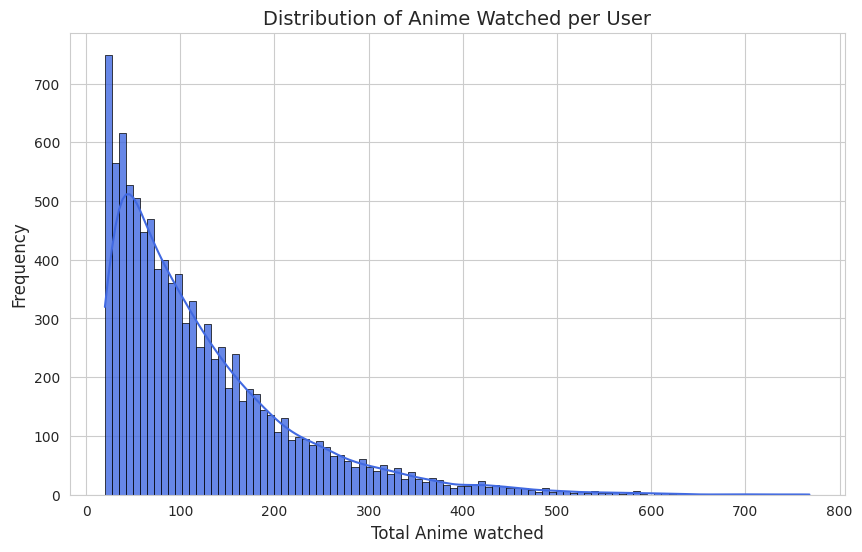

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(count_anime_watch_user["anime_id"], bins=100, alpha=0.8, fill=True, kde=True, edgecolor="black", color="royalblue")
plt.title("Distribution of Anime Watched per User", fontsize=14)
plt.xlabel("Total Anime Watched", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

In [ ]:
count_anime_watch_user_75_percentile = count_anime_watch_user[count_anime_watch_user.anime_id < 300]

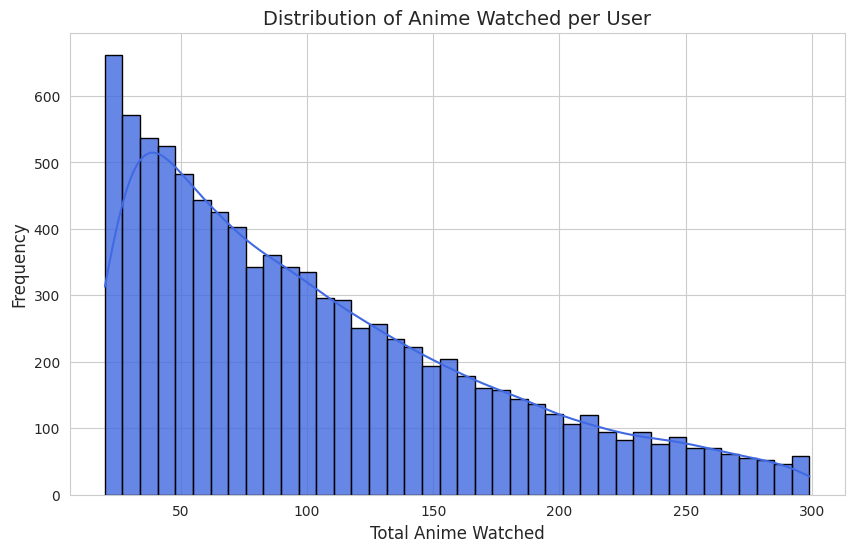

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(count_anime_watch_user_75_percentile["anime_id"], bins=40, alpha=0.8, fill=True, kde=True, edgecolor="black", color="royalblue")
plt.title("Distribution of Anime Watched per User", fontsize=14)
plt.xlabel("Total Anime Watched", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

In [ ]:
len(count_anime_watch_user[count_anime_watch_user.anime_id == 20])

96

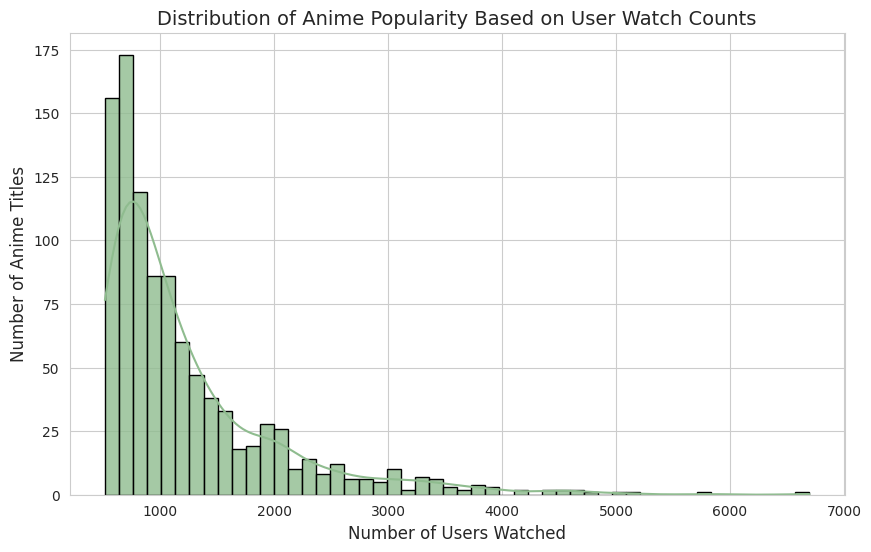

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(count_user_in_anime["user_id"], bins=50, alpha=0.8, fill=True, kde=True, edgecolor="black", color="darkseagreen")
plt.title("Distribution of Anime Popularity Based on User Watch Counts", fontsize=14)
plt.xlabel("Number of Users Watched", fontsize=12)
plt.ylabel("Number of Anime Titles", fontsize=12)
plt.show()

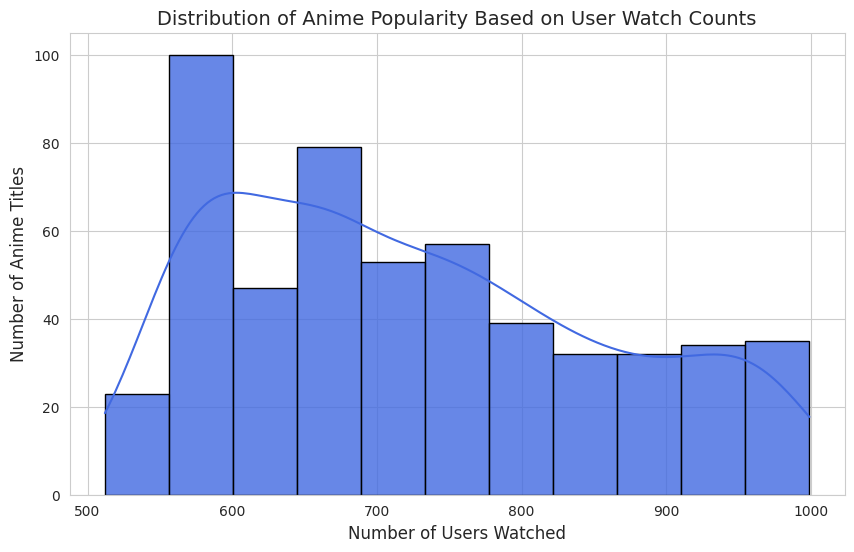

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(count_user_in_anime[count_user_in_anime['user_id']<1000]["user_id"], bins=50, alpha=0.8, fill=True, kde=True, edgecolor="black", color="royalblue")
plt.title("Distribution of Anime Popularity Based on User Watch Counts", fontsize=14)
plt.xlabel("Number of Users Watched", fontsize=12)
plt.ylabel("Number of Anime Titles", fontsize=12)
plt.show()

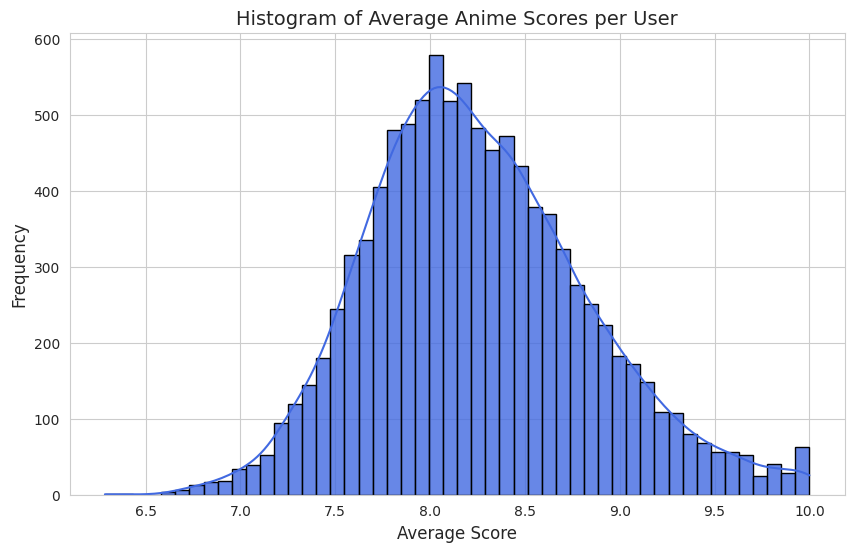

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(count_anime_watch_user["score"], bins=50, alpha=0.8, fill=True, kde=True, edgecolor="black", color="royalblue")
plt.title("Histogram of Average Anime Scores per User", fontsize=14)
plt.xlabel("Average Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

In [ ]:
anime_stat = anime_filtered.groupby('anime_title').agg({'user_id': 'count', 'score':'mean'})
anime_stat[['user_id']].describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,1000.0,1232.471,803.056838,512.0,690.0,960.0,1449.25,6697.0


### Anime Information

In [ ]:
top_3_anime = anime_detail.sort_values('popularity')[:3]

In [ ]:
top_3_anime

,id,title,main_picture,alternative_titles,start_date,end_date,mean,rank,popularity,num_list_users,num_scoring_users,nsfw,media_type,status,genres,num_episodes,rating,pictures,related_anime,source
4103,16498,Shingeki no Kyojin,{'medium': 'https://cdn.myanimelist.net/images...,"{'synonyms': ['AoT', 'SnK'], 'en': 'Attack on ...",2013-04-07,2013-09-29,8.55,113.0,1,4040501,2854339,white,tv,finished_airing,"[{'id': 1, 'name': 'Action'}, {'id': 46, 'name...",25,r,[{'medium': 'https://cdn.myanimelist.net/image...,"[{'node': {'id': 18397, 'title': 'Shingeki no ...",manga
10806,1535,Death Note,{'medium': 'https://cdn.myanimelist.net/images...,"{'synonyms': ['DN'], 'en': 'Death Note', 'ja':...",2006-10-04,2007-06-27,8.62,88.0,2,3990721,2800382,white,tv,finished_airing,"[{'id': 40, 'name': 'Psychological'}, {'id': 2...",37,r,[{'medium': 'https://cdn.myanimelist.net/image...,"[{'node': {'id': 2994, 'title': 'Death Note: R...",manga
2253,5114,Fullmetal Alchemist: Brotherhood,{'medium': 'https://cdn.myanimelist.net/images...,{'synonyms': ['Hagane no Renkinjutsushi: Fullm...,2009-04-05,2010-07-04,9.09,2.0,3,3420999,2160358,white,tv,finished_airing,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'...",64,r,[{'medium': 'https://cdn.myanimelist.net/image...,"[{'node': {'id': 121, 'title': 'Fullmetal Alch...",manga


In [ ]:
from IPython.display import display, HTML

html = """
    <style>
        table {
            width: 100%;
            border-collapse: collapse;
            background-color: white;
        }
        th, td {
            border: 1px solid black;
            padding: 15px;
            text-align: left;
            color: black;
            font-family: Arial, sans-serif;
        }
        th {
            background-color: #f2f2f2;
            font-size: 18px;
        }
        td {
            font-size: 16px;
            color: #333;
        }
        img {
            display: block;
            margin: auto;
        }
    </style>
    <table>
        <tr>
            <th><Picture></th>
            <th>Title</th>
            <th>Description</th>
        </tr>
    """

for _, row in top_3_anime.iterrows():
    html += f"""
    <tr>
        <td><img src='{row["main_picture"]["medium"]}' width='100'></td>
        <td><strong>{row["title"]}</strong><br>({row["media_type"]}, {row["num_episodes"]} episodes)</td>
        <td><br>Mean Score: {row["mean"]}<br>
        Popularity: {row["popularity"]}<br>
        Total Watched User: {row["num_scoring_users"]}</td>
    </tr>
    """

html += "</table>"
display(HTML(html))

,Title,Description
,"Shingeki no Kyojin(tv, 25 episodes)",Mean Score: 8.55 Popularity: 1 Total Watched User: 2854339
,"Death Note(tv, 37 episodes)",Mean Score: 8.62 Popularity: 2 Total Watched User: 2800382
,"Fullmetal Alchemist: Brotherhood(tv, 64 episodes)",Mean Score: 9.09 Popularity: 3 Total Watched User: 2160358


## Calculate Sparsity

In [ ]:
len(animelist), len(anime_filtered)

(3733636, 1232471)

In [ ]:
animelist

,username,anime_id,anime_title,status,score,num_episodes_watched,updated_at,user_id
0,----2o,8074,Highschool of the Dead,completed,7,12,2017-04-03T06:08:19+00:00,1
1,----2o,31952,Kono Bijutsu-bu ni wa Mondai ga Aru!,completed,7,12,2017-07-22T22:20:08+00:00,1
2,----2o,15227,Kono Sekai no Katasumi ni,completed,9,1,2018-02-10T05:41:34+00:00,1
3,----2o,30831,Kono Subarashii Sekai ni Shukufuku wo!,completed,8,10,2016-12-01T23:13:26+00:00,1
4,----2o,32937,Kono Subarashii Sekai ni Shukufuku wo! 2,completed,8,10,2017-03-16T05:58:32+00:00,1
...,...,...,...,...,...,...,...,...
3733631,zzzett,1535,Death Note,completed,10,37,2009-05-20T14:08:08+00:00,22989
3733632,zzzett,3092,Junjou Romantica,completed,10,12,2009-05-24T11:29:41+00:00,22989
3733633,zzzett,365,Fake,completed,8,1,2009-06-22T14:34:13+00:00,22989
3733634,zzzett,1726,Devil May Cry,completed,8,12,2009-05-20T14:09:03+00:00,22989


In [ ]:
from scipy.sparse import csr_matrix

def calculate_sparsity(user_item_matrix):
  matrix = user_item_matrix.pivot_table(index='user_id', columns='anime_id', values='score', fill_value=0)
  sparse_matrix = csr_matrix(matrix.values)

  total_possible = matrix.shape[0] * matrix.shape[1]

  nonzero_count = sparse_matrix.count_nonzero()

  sparsity = 1 - (nonzero_count / total_possible)
  return sparsity

In [ ]:
calculate_sparsity(animelist)

0.9883552251959558

In [ ]:
calculate_sparsity(anime_filtered)

0.8767529000000001

## Check Sequence Dependence

In [ ]:
!pip install mlxtend

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [ ]:
sequences_sample = anime_filtered.groupby('user_id')['anime_title'].apply(list).tolist()

In [ ]:
sequences_sample[2]

['Hellsing',
 'Code Geass: Hangyaku no Lelouch',
 'Great Teacher Onizuka',
 'Naruto',
 'Gungrave',
 'Death Note',
 'Bleach Movie 1: Memories of Nobody',
 'Trinity Blood',
 'Shakugan no Shana',
 'Trigun',
 'Koukaku Kidoutai',
 'Koukaku Kidoutai: Stand Alone Complex',
 'Innocence',
 'Fate/stay night',
 'Samurai Champloo',
 'Initial D First Stage',
 'Last Exile',
 'Kenpuu Denki Berserk',
 'Black Lagoon',
 'Black Lagoon: The Second Barrage',
 'Koukyoushihen Eureka Seven',
 'Fullmetal Alchemist',
 'Gantz',
 'Juubee Ninpuuchou',
 'Onegai☆Teacher',
 'xxxHOLiC',
 'Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shinobu Houjou Dattebayo!',
 'Naruto: Shippuuden Movie 1',
 'Bleach Movie 2: The DiamondDust Rebellion - Mou Hitotsu no Hyourinmaru',
 'Black Cat (TV)',
 'Bleach: The Sealed Sword Frenzy',
 'Fate/stay night Movie: Unlimited Blade Works',
 'Shingeki no Kyojin',
 'Baka to Test to Shoukanjuu',
 'Akira',
 'Chrno Crusade',
 'Claymore',
 'Hellsing Ultimate',
 'Rurouni Kenshin: Meiji Kenkaku Romanta

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(sequences_sample).transform(sequences_sample)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,"""Oshi no Ko""",.hack//Sign,07-Ghost,11eyes,3-gatsu no Lion,3-gatsu no Lion 2nd Season,5-toubun no Hanayome,5-toubun no Hanayome ∬,86,86 Part 2,...,Zetsuen no Tempest,Zoku Natsume Yuujinchou,Zoku Sayonara Zetsubou Sensei,Zom 100: Zombie ni Naru made ni Shitai 100 no Koto,Zombie-Loan,Zombieland Saga,ef: A Tale of Melodies.,ef: A Tale of Memories.,xxxHOLiC,xxxHOLiC◆Kei
0,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,True,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
9997,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,True,True,False,False
9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
frequent_itemsets = fpgrowth(df, min_support=0.1, use_colnames=True)

In [ ]:
#pickle.dump(frequent_itemsets, open('/content/drive/MyDrive/Final Project/Codes/animelist-goodbooks-recommendation/animelist/frequent_items.pkl', 'wb'))

In [ ]:
frequent_itemsets = pickle.load(open('/content/drive/MyDrive/Final Project/Codes/animelist-goodbooks-recommendation/animelist/frequent_items.pkl', 'rb'))

In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.9)

In [ ]:
len(rules)

281539

In [ ]:
rules.sort_values('confidence', ascending=False)[:25][['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
42120,"(Shingeki no Kyojin, Steins;Gate: Oukoubakko n...",(Steins;Gate),0.1147,0.999129,2.390833
39781,"(Fullmetal Alchemist: Brotherhood, Fate/stay n...",(Code Geass: Hangyaku no Lelouch),0.1030,0.999030,1.947047
42125,"(Steins;Gate: Oukoubakko no Poriomania, Fullme...",(Steins;Gate),0.1011,0.999012,2.390552
39783,"(Fate/stay night: Unlimited Blade Works, Fullm...",(Code Geass: Hangyaku no Lelouch),0.1003,0.999004,1.946997
42124,"(Steins;Gate: Oukoubakko no Poriomania, Fullme...",(Steins;Gate),0.1173,0.998298,2.388844
39759,"(Death Note, Code Geass: Hangyaku no Lelouch R...",(Code Geass: Hangyaku no Lelouch),0.1053,0.998104,1.945243
42239,"(Shingeki no Kyojin, Steins;Gate Movie: Fuka R...",(Steins;Gate),0.1051,0.998101,2.388372
45180,"(Shingeki no Kyojin Season 2, Toradora!, Death...",(Code Geass: Hangyaku no Lelouch),0.1030,0.998062,1.945161
23712,"(Fate/Zero 2nd Season, No Game No Life, Hatara...",(Fate/Zero),0.1025,0.998053,3.290645
22631,"(Shingeki no Kyojin Season 2, Psycho-Pass, Cod...",(Code Geass: Hangyaku no Lelouch),0.1021,0.998045,1.945128


In [ ]:
rules['len_antecedents'] = rules['antecedents'].str.len()
rules['len_consequents'] = rules['consequents'].str.len()

In [ ]:
top_10_rules = rules[(rules.len_antecedents == 1) & (rules.len_consequents == 1)].sort_values('confidence', ascending=False)[:10]

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
G = nx.DiGraph()

# Add edges (rules) to graph
for idx, row in top_10_rules.iterrows():
    ant = ', '.join(row['antecedents'])  # Join if multiple items
    cons = ', '.join(row['consequents'])
    conf = row['confidence']
    G.add_edge(ant, cons, weight=conf)

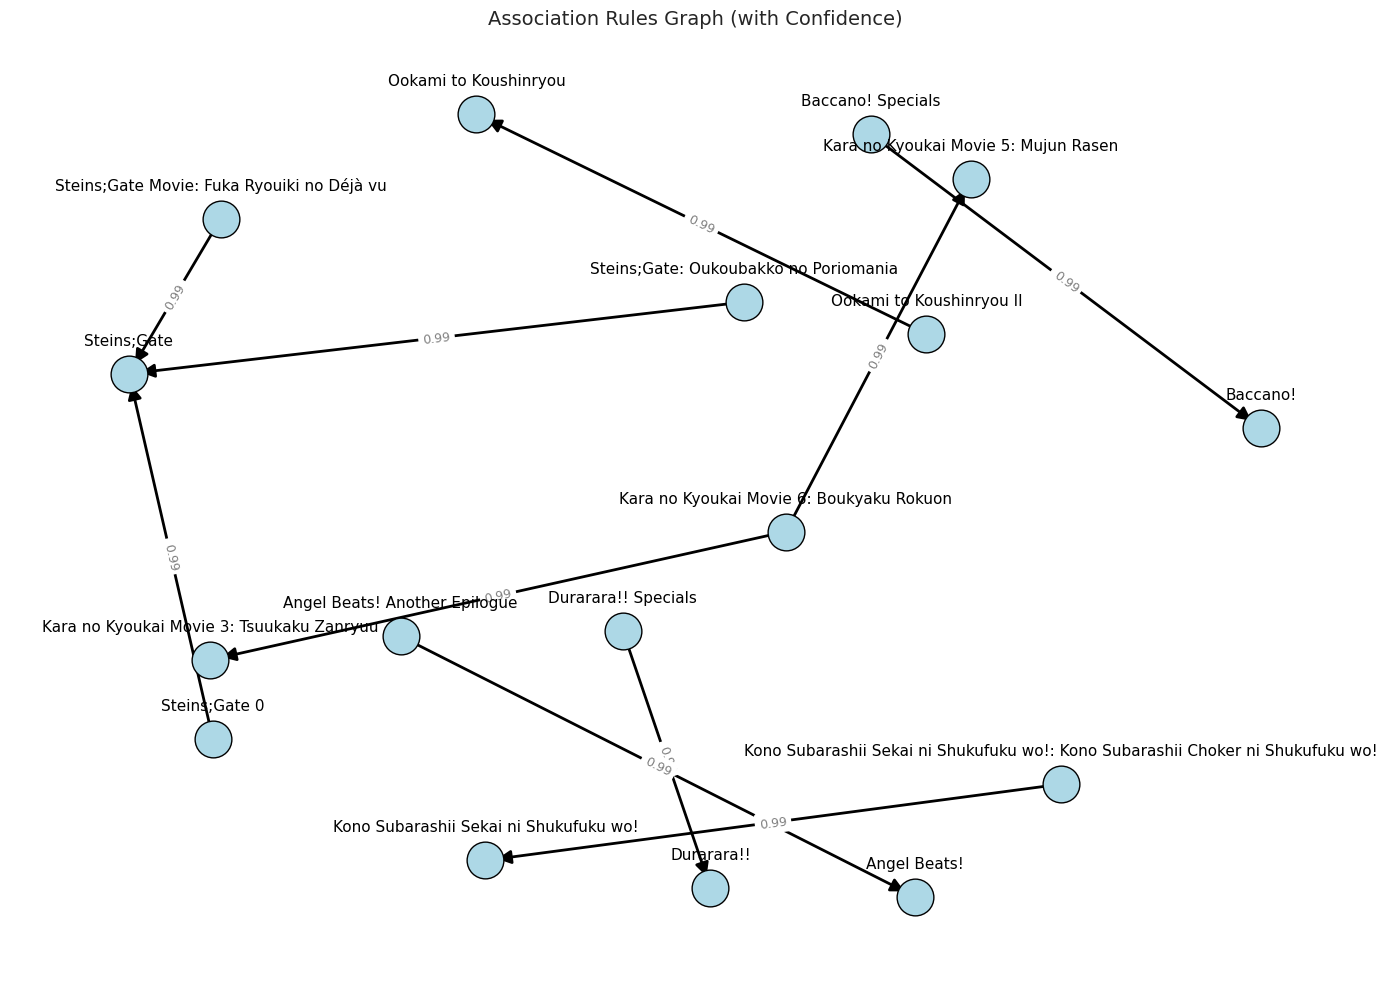

In [ ]:
pos = nx.spring_layout(G, seed=42, k=1.2)

# Extract weights (confidence)
weights = [G[u][v]['weight'] for u, v in G.edges()]
edge_colors = weights
edge_labels = {(u, v): f"{G[u][v]['weight']:.2f}" for u, v in G.edges()}

# Create figure
plt.figure(figsize=(14, 10))

nx.draw_networkx_edges(
    G, pos,
    width=2,
    arrows=True,
    arrowstyle='-|>',
    arrowsize=20# slight curve for better visibility
)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue', edgecolors='black')

# Draw node labels (above nodes)
label_pos = {k: (v[0], v[1] + 0.08) for k, v in pos.items()}
nx.draw_networkx_labels(G, label_pos, font_size=11)

# Draw edge labels (confidence)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='gray', font_size=9)

# Final touches
plt.title("Association Rules Graph (with Confidence)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()